# Hiring problem
1. 새로 고용할 사람 찾기
2. 하루 한명씩 인터뷰를 하면서 고용할 지 말지 결정 가능, 면접자 한명 당 중개인한테 수수료 줘야함
3. 고용 시에도 비용이 듦 
4. 최적의 인원을 고용하기 위해 얼마의 예산이 드는지 예측

# Probablisitic analysis
- 인터뷰 인원이 고정 되어 있다는 가정하에 고용하는 인원x고용 비용 을 중점적으로 확인
- 최악의 경우는 모든 인원을 고용하는 경우(인터뷰이의 능력이 계속 상승,n*Ch) 다만 이런 경우는 거의 나오지 않는다.
- 따라서, (인터뷰이의 능력 )분포를 예상,가정하고 평균적인 상황을 고려한다.
- 이 경우 모든 인터뷰이 능력에 순위를 매기고, 그 순위를 랜덤 순열 배치, n!개만큼의 동등한 확률로 순서 배치 된다.
- 랜덤화하는 것이 중요

# Average-case running time 
   확률 분포가 input 값에 상관없이 정해진 경우 
# Expected running time 
   알고리즘이 랜덤 확률 선택을 할 때

# Lemma 5.1

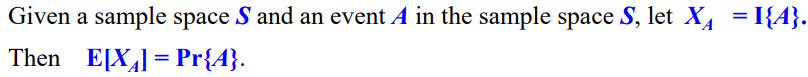

In [17]:
Image('C:/Users/82106/Desktop/알고리즘(정순영)/캡쳐/4.png')

In [99]:
from IPython.display import Image

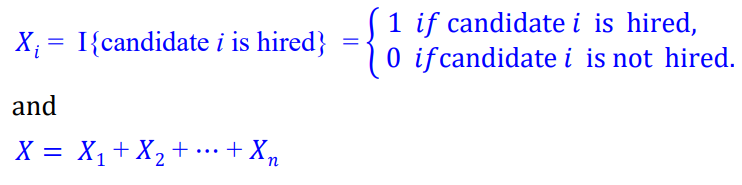

In [14]:
Image('C:/Users/82106/Desktop/알고리즘(정순영)/캡쳐/3.png')

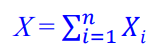

In [15]:
Image('C:/Users/82106/Desktop/알고리즘(정순영)/캡쳐/1.png')

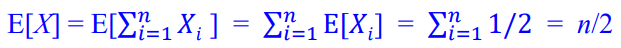

In [16]:
Image('C:/Users/82106/Desktop/알고리즘(정순영)/캡쳐/2.png')

- Lemma 5.1에 의해 E[Xi]=i 번째 지원자가 고용될 확률
- i번째 지원자가 고용될 확률은 i-1까지 모든 지원자보다 능력이 높은 경우(rank가 더 높은 경우)
- 따라서 E[Xi]=1/i => 요거 다시 확인 

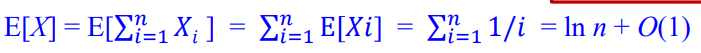

In [19]:
Image('C:/Users/82106/Desktop/알고리즘(정순영)/캡쳐/5.png')

Hiring problem은 최악의 케이스를 최대 한계점으로 두고 있다 

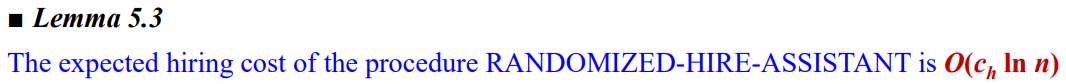

In [20]:
Image('C:/Users/82106/Desktop/알고리즘(정순영)/캡쳐/6.png')

# Heapsort

- (참조) https://ratsgo.github.io/data%20structure&algorithm/2017/09/27/heapsort/
- https://leedakyeong.tistory.com/entry/%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98-%ED%8C%8C%EC%9D%B4%EC%8D%AC%EC%9C%BC%EB%A1%9C-%ED%9E%99-%EC%A0%95%EB%A0%AC-%EA%B5%AC%ED%98%84%ED%95%98%EA%B8%B0-heap-sort-in-python
- Heap : binary tree 형태로 볼 수 있는 array 객체
- 한 노드 당 최대 2개의 자식 노드를 가짐, 마지막 레벨의 노드를 제외하고 모든 레벨에서 노드들이 꽉 찬 완전이진트리를 기본
- length : 각 heap의 array에 있는 요소들의 숫자
- heap-size : 요소들의 종류?? (0 <= heap-size <= length) 

- heap order property : 각 노드의 값은 자신의 자식노드가 가진 값보다 크거나 같다(최대 힙, Max heap).  
-                       혹은 각 노드의 값은 자신의 자식노드가 가진 값보다 작거나 같다(최소 힙, Min heap).
- heap shape property : 모양은 완전이진트리이다. 즉 마지막 레벨의 모든 노드는 왼쪽에 쏠려 있다.

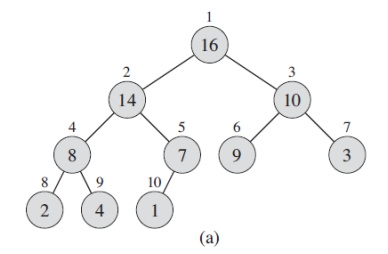

In [3]:
Image('C:/Users/82106/Desktop/알고리즘(정순영)/캡쳐/7.png')

- 이런 식으로 첫 인덱스 1부터 자식노드를 왼쪽은 2i, 오른쪽은 2i+1로 설정하면 왼쪽부터 순서대로 index 설정 가능

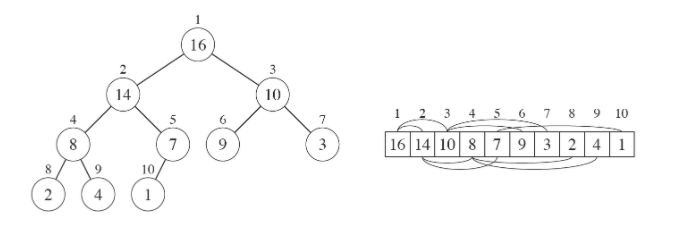

In [5]:
# 일차원 배열(array)로 표현할 수 있다.
Image('C:/Users/82106/Desktop/알고리즘(정순영)/캡쳐/8.png')

# Heapify
- 주어진 자료 구조를 위와 같이 heap 성질을 만족하도록 하는 작업 
- 계산복잡성은 트리 높이에 의존적(최악의 루트 노드부터 잎새 노드까지) 따라서 O(log(n))

In [77]:
# idx는 첫 인덱스, n은 heap의 길이 
# 오름차순으로 정렬하고 싶으면 li[s_idx] < li[l,r] 부분 부등호 방향을 반대로
def heapify(unsorted, index, heap_size):
    largest = index
    left_index = 2 * index + 1
    right_index = 2 * index + 2
    if left_index < heap_size and unsorted[left_index] > unsorted[largest]:
        largest = left_index
    if right_index < heap_size and unsorted[right_index] > unsorted[largest]:
        largest = right_index
    if largest != index:
        unsorted[largest], unsorted[index] = unsorted[index], unsorted[largest]
        heapify(unsorted, largest, heap_size)

def build_max_heap(unsorted):
    n = len(unsorted)
    for i in range(n // 2 - 1, -1, -1):
        heapify(unsorted, i, n)
    return unsorted

def heap_sort(unsorted):
    n = len(unsorted)
    # BUILD-MAX-HEAP (A) : 위의 1단계
    # 인덱스 : (n을 2로 나눈 몫-1)~0
    # 최초 힙 구성시 배열의 중간부터 시작하면 
    # 이진트리 성질에 의해 모든 요소값을 
    # 서로 한번씩 비교할 수 있게 됨 : O(n)
    for i in range(n // 2 - 1, -1, -1):
        heapify(unsorted, i, n)
    # Recurrent (B) : 2~4단계
    # 한번 힙이 구성되면 개별 노드는
    # 최악의 경우에도 트리의 높이(logn)
    # 만큼의 자리 이동을 하게 됨
    # 이런 노드들이 n개 있으므로 : O(nlogn)
    for i in range(n - 1, 0, -1):
        unsorted[0], unsorted[i] = unsorted[i], unsorted[0]  
        heapify(unsorted, 0, i)
    return unsorted

- 첫 if 문에서 , 첫 조건은 heap의 최대 길이만큼까지만 인덱스를 설정, 숫자 교환
- 두 번째 조건은 자식 노드가 부모 노드보다 큰 경우 교환을 위함
- 두 번째 if 문은 왼쪽보다 오른쪽이 큰 경우 교환을 위해 설정
- 마지막 if 문은 두 if 문중 하나라도 만족하면 s_idx와 idx 해당하는 값들을 교환하여 크기 순서 유지
- 첫 if문, 두 번째 if 문을 모두 만족하지 않으면 세번째 if 문에서 교환자체가 일어나지 않음(크기가 이미 부모가 가장 큼)
- 첫 if문만 만족시 왼쪽 자식이 부모보다 크므로 마지막 if 문에서 교환한다.
- 두 번재 if문만 만족시 오른쪽 자식이 부모보다 크므로 마지막 if 문에서 교환
- 첫, 두 번째 if문이 만족시 오른쪽 자식이 가장 크므로 오른쪽 자식과 부모 위치를 교환 
- heapify로 특정 인덱스 노드와 그 자식 노드를 크기 순으로 정렬, build로 숫자가 큰 index부터 차례대로 heapify해서 Max heap 만듦
- 각 heapify는 cost가 O(ln n)이고, build max heap은 heapify를 O(n)번 반복하므로 cost는 O(n lg n)

- heap sort : max heap의 젤 처음 값이 가장 크므로 이를 맨뒤로 보낸 뒤, 나머지 값들을 다시 heapify한다.
- 이 과정을 반복하면 크기가 오름 차순으로 정리가 된다. 
- 이미 max heap을 한 번 거쳤기 때문에, 그 다음 부터는 build max heap이 아닌, heapify만으로도 가장 큰 값을 맨 앞으로 보낼 수 있다. 

In [78]:
# 확인 과정 
A=[4,1,3,2,16,9,10,14,8,7]

In [79]:
B=[1,4,2,8,9,12,20]

In [80]:
build_max_heap(A)

[16, 14, 10, 8, 7, 9, 3, 2, 4, 1]

In [81]:
build_max_heap(B)

[20, 9, 12, 8, 4, 1, 2]

In [87]:
heap_sort([4,1,3,2,16,9,10,14,8,7])

[1, 2, 3, 4, 7, 8, 9, 10, 14, 16]

# heapq 코드 정리
## heapq 코드를 반복하면 sort하는 거보다 더 빠른 연산 및 저장공간 낭비를 막을 수 있다 
- heapq.heappush(리스트, 넣을 값) : 리스트 설정 후(보통 빈 리스트) 값을 넣어주면 넣을 때마다 heap구조를 유지한 상태로 넣어줌 
- ex) heap= [] heapq.heappush(heap, 4) heapq.heappush(heap, 1) heapq.heappush(heap, 7) heapq.heappush(heap, 3)을 입력하면 리스트 heap은 자동으로 [1,3,7,4]이 됨 
- heapq.heappop : 힙 형태인 리스트에서 index 0 인 것을 삭제하면 서 동시에 반환 ex) print(heapq.heappop(heap)) 시 1 반환, heap은 [3,7,4]삭제 후에도 남은 리스트들은 heap형태로 저장 
- heapq.heapify : 일반 리스트를 heap 형태로 전환 
  ex) heap = [4, 1, 7, 3, 8, 5] ; heapq.heapify(heap) ; print(heap) => [1, 3, 5, 4, 8, 7]
  
- heapq.nlargest(n, iterable, key=None) :n 개의 가장 큰 요소로 구성된 리스트를 반환
- heapq.nsmallest(n, iterable, key=None) :n 개의 가장 작은 요소로 구성된 리스트를 반환
- eapq.heappushpop(heap, item)
    : 힙에 item을 푸시한 다음, heap에서 가장 작은 항목을 팝하고 반환합니다. 결합한 액션은 heappush()한 다음 heappop()을 별도로 호출하는 것보다 더 효율적으로 실행합니다.
- heapq.heapreplace(heap, item) : heap에서 가장 작은 항목을 팝하고 반환하며, 새로운 item도 푸시합니다. 힙 크기는 변경되지 않습니다. 힙이 비어 있으면, IndexError가 발생합니다.
- heapq.merge(*iterables, key=None, reverse=False) : 
  여러 정렬된 입력을 단일 정렬된 출력으로 병합합니다 (예를 들어, 여러 로그 파일에서 타임 스탬프 된 항목을 병합합니다). 정렬된 값에 대한 이터레이터를 반환합니다.

In [1]:
# scoville
import heapq

def solution(scoville, K):
    m = min(scoville)       # 최소값
    answer = 0
    if m >= K:             # 최소값이 K이상이면 바로 0 반환 
        return answer
    while m < K:
        if (len(scoville)==2)&(scoville[0]+scoville[1]*2 < K): # 반복하다가 2개 남았는데 그 합이 K보다 작으면 -1 반환 
            return -1 
        else:
            heapq.heapify(scoville)
            m1=scoville[0] ; scoville1=scoville[1:] ; heapq.heapify(scoville1) ; m2 = scoville1[0]
            m= m1+m2*2
            scoville.remove(m1) ; scoville.remove(m2) ; scoville.append(m)  
            answer += 1
    return answer

In [2]:
solution([1, 2, 3, 9, 10, 12],7)

2

In [3]:
# 최대 힙 프린트하기 
import heapq

nums = [4, 1, 7, 3, 8, 5]
heap = []

for num in nums:
  heapq.heappush(heap, (-num, num))  # (우선 순위, 값)

print(heap)
while heap:
  print(heap,heapq.heappop(heap)[1])  # index 1 튜플형태로 되어 있으므로 값만 추출하기 위해 

[(-8, 8), (-7, 7), (-5, 5), (-1, 1), (-3, 3), (-4, 4)]
[(-7, 7), (-4, 4), (-5, 5), (-1, 1), (-3, 3)] 8
[(-5, 5), (-4, 4), (-3, 3), (-1, 1)] 7
[(-4, 4), (-1, 1), (-3, 3)] 5
[(-3, 3), (-1, 1)] 4
[(-1, 1)] 3
[] 1


In [4]:
# K번째 값 
import heapq

def kth_smallest(nums, k):
    heap = []
    for num in nums:
        heapq.heappush(heap, num)

    kth_min = None
    for _ in range(k):
        kth_min = heapq.heappop(heap)
    return kth_min

print(kth_smallest([4, 1, 7, 3, 8, 5], 3))

4


In [5]:
# heap sort 
import heapq

def heap_sort(nums):
    heap = []
    for num in nums:
        heapq.heappush(heap, num)
  
    sorted_nums = []
    while heap:
        sorted_nums.append(heapq.heappop(heap))
    return sorted_nums

print(heap_sort([4, 1, 7, 3, 8, 5]))

[1, 3, 4, 5, 7, 8]


In [6]:
# 이중 우선순위 
# heap 사용하려고 노력 => 테스트는 실패
import heapq
def solution(operations):
    answer = []
    for i in operations:
        heapq.heapify(answer)
        if i == 'D -1':
            if len(answer)==0:
                pass
            else:
                heapq.heappop(answer)
        elif i == 'D 1':
            answer.remove(heapq.nlargest(1,answer)[0])
        else:
            answer.append(int(i.split()[1]))
    if len(answer)==0:
        return [0,0]
    else:
        return [heapq.nlargest(1,answer)[0],heapq.nsmallest(1,answer)[0]]

In [7]:
# heap을 쓰지 않아도 된다 
def solution(operations):
    answer = []
    for i in operations:
        a,b=i.split()
        if a=='I':
            answer.append(int(b))
        else:
            if len(answer)==0:
                pass
            else:
                if b=='1':
                    answer.remove(max(answer))
                else:
                    answer.remove(min(answer))
    if len(answer)==0:
        return [0,0]
    else:
        return [max(answer),min(answer)]   

In [9]:
print(solution(['l 16','D 1']),solution(['I 7','I 5','I -5','D -1']))

[0, 0] [7, 5]


In [10]:
# 디스크 컨트롤러 
# 입력시점은 순차적인듯 
# 최종적으로는 테스트 통과 실패 - 구글링으로 넘어감 
import heapq

def solution(jobs):
    answer=0
    n=len(jobs)
    a=jobs[0]
    end = jobs[0][1]
    answer += jobs[0][1]-jobs[0][0]
    jobs.remove(jobs[0])
    for i in range(n):
        if jobs[0][0] >= end:                 # 다음 요청기간이 이전 처리기간 밖이면 처리기간 = 요청부터 처리까지 걸린 시간
            answer += jobs[0][1]
            end = jobs[0][1]+jobs[0][0]
            jobs.remove(jobs[0])
        else:
            wait=[]
            for k,j in enumerate(jobs):       # 이전 처리 기간안에 요청이 들어온 것들 모아 놓기
                if j[0]<end:
                    heapq.heappush(wait,[j[1],k])
            for y in wait:
                answer += end + jobs[wait[0][1]][1]-jobs[wait[0][1]][0]
                end = end + jobs[wait[0][1]][1]
                heapq.heappop(wait)
                jobs.remove(jobs[k])
            
    return answer//n

In [11]:
# 구글링 한거 
# 처리 중에 작업 요청이 여러 개 들어오면 소요 시간이 적은 것부터 처리하는게 평균을 감소시킴
# 이 알고리즘은 각 작업에 대해 시간을 계산하기 보다 작업 별 소요시간/이전 작업기간과 겹칠시 증가하는 시간을 따로 구분하여 코딩 
import heapq
def solution(jobs):
    last=-1                                # 마지막으로 처리한 작업의 시작 시점
    now=0                                  # 마지막으로 처리한 작업의 종료 시점 
    answer=0                               # 각 작업별 처리 시간들의 합
    wait=[]                                # 대기 중인 작업들을 넣어주는 리스트 
    n=len(jobs)
    count=0
    while(count<n):
        for job in jobs:                   # 일단 모든 jobs에 대해 이전 처리기간에 입력 시점이 있는 것들 모두 wait에 저장 
            if last < job[0]<=now:         # 범위를 초과,이하로 설정하면서 겹치지 않는 작업과 시작 작업을 처리할 수 있게 정리 
                answer+=(now-job[0])       # 있는 경우 현재 시점(작업이 종료된 시점)과 요청기간 사이 시간을 더해줌 
                heapq.heappush(wait,job[1])
        if len(wait)>0:                    # wait가 있는 경우 (가장 작은 작업의 소요 시간)*(wait의 요소개수)만큼 각 처리 시간만큼 멀어짐
            answer += len(wait)*wait[0]
            last=now                       # 들어온 작업한개를처리 했으므로 이전 종료시점이 현재 지점이 됨
            now+=heapq.heappop(wait)       # 현 작업 종료 후 다음 작업 소요 시간만큼 작업 종료 시점을 추가 
            count+=1
        else:
            now+=1                         # wait가 없는 경우 종료 시점을 1씩 증가 시켜 첫 if문에서 처리가 되도록 함
    return answer//n

In [12]:
print(solution([[0, 3], [1, 9], [2, 6]]),solution([[0, 3], [4, 9], [15, 6]]))

9 6
